# Linear Regression Exercises
## Econometrics Part 1 - The Linear Model

**Instructor:** Jose Angel Garcia Sanchez  
**Institution:** Université Paris 1 Panthéon-Sorbonne  
**Course:** Sorbonne Data Analytics

---

This notebook contains practical exercises to complement the theoretical concepts from the linear regression course.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from scipy import stats
from sklearn.linear_model import LinearRegression


np.random.seed(42)

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

## Exercise 1: Understanding the Simple Linear Model

Consider the simple linear model: $y_i = b_0 + b_1x_i + u_i$

### Part A: Generate synthetic data

Generate a dataset with:
- Sample size: N = 100
- True parameters: $b_0 = 5$, $b_1 = 2$
- $x_i \sim \text{Uniform}(0, 10)$
- $u_i \sim N(0, \sigma^2)$ with $\sigma = 2$

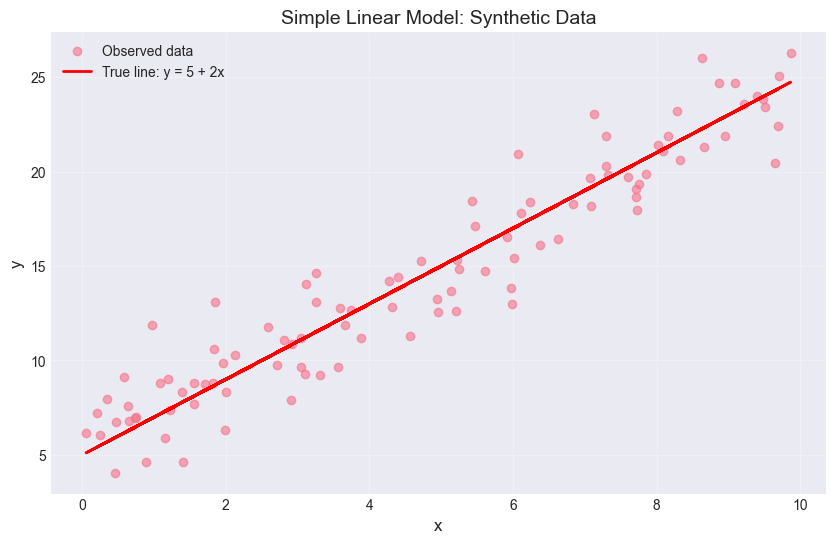

True parameters: b0 = 5, b1 = 2
Sample size: N = 100
Error variance: σ² = 4


In [2]:
# Exercise 1A: Generate synthetic data
N = 100
b0_true = 5
b1_true = 2
sigma = 2

# TODO: Generate x values uniformly distributed between 0 and 10
x = np.random.uniform(0, 10, N)

# TODO: Generate error terms from normal distribution
u = np.random.normal(0, sigma, N)

# TODO: Generate y values using the linear model
y = b0_true + b1_true * x + u

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.6, label='Observed data')
plt.plot(x, b0_true + b1_true * x, 'r-', label=f'True line: y = {b0_true} + {b1_true}x', linewidth=2)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Simple Linear Model: Synthetic Data', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"True parameters: b0 = {b0_true}, b1 = {b1_true}")
print(f"Sample size: N = {N}")
print(f"Error variance: σ² = {sigma**2}")

### Part B: Manual OLS Estimation

Implement OLS estimation using the formulas from the course:

$$\hat{b}_1 = \frac{\sum(x_i - \bar{x})(y_i - \bar{y})}{\sum(x_i - \bar{x})^2}$$

$$\hat{b}_0 = \bar{y} - \hat{b}_1\bar{x}$$

In [4]:
# Exercise 1B: Manual OLS estimation

# TODO: Calculate sample means
x_bar = np.mean(x)
y_bar = np.mean(y)

# TODO: Calculate b1_hat using the OLS formula
numerator = np.sum((x - x_bar) * (y - y_bar))
denominator = np.sum((x - x_bar)**2)
b1_hat = numerator / denominator

# TODO: Calculate b0_hat
b0_hat = y_bar - b1_hat * x_bar

# Calculate fitted values
y_hat = b0_hat + b1_hat * x

# Calculate residuals
u_hat = y - y_hat

print("OLS Estimates (Manual):")
print(f"b0_hat = {b0_hat:.4f} (True: {b0_true})")
print(f"b1_hat = {b1_hat:.4f} (True: {b1_true})")
print(f"\nMean of residuals: {np.mean(u_hat):.6f} (should be ≈ 0)")

OLS Estimates (Manual):
b0_hat = 5.4302 (True: 5)
b1_hat = 1.9080 (True: 2)

Mean of residuals: -0.000000 (should be ≈ 0)


### Part C: Visualize the OLS fit

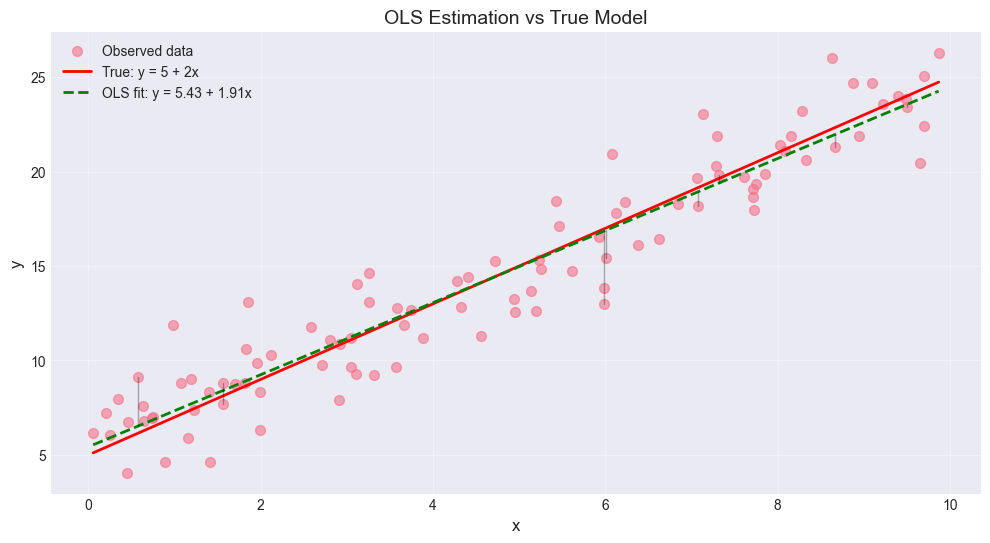

In [5]:
# Exercise 1C: Visualize OLS fit

plt.figure(figsize=(12, 6))

# Sort for smooth line plotting
sort_idx = np.argsort(x)
x_sorted = x[sort_idx]
y_hat_sorted = y_hat[sort_idx]

plt.scatter(x, y, alpha=0.6, label='Observed data', s=50)
plt.plot(x_sorted, b0_true + b1_true * x_sorted, 'r-', 
         label=f'True: y = {b0_true} + {b1_true}x', linewidth=2)
plt.plot(x_sorted, y_hat_sorted, 'g--', 
         label=f'OLS fit: y = {b0_hat:.2f} + {b1_hat:.2f}x', linewidth=2)

# Show residuals for first 10 points
for i in range(10):
    plt.plot([x[i], x[i]], [y[i], y_hat[i]], 'k-', alpha=0.3, linewidth=1)

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('OLS Estimation vs True Model', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Part D: Calculate $R^2$

Calculate the coefficient of determination:

$$R^2 = \frac{\sum(\hat{y}_i - \bar{y})^2}{\sum(y_i - \bar{y})^2} = 1 - \frac{\sum \hat{u}_i^2}{\sum(y_i - \bar{y})^2}$$

In [6]:
# Exercise 1D: Calculate R-squared

# TODO: Calculate SST (Total Sum of Squares)
SST = np.sum((y - y_bar)**2)

# TODO: Calculate SSR (Explained Sum of Squares)
SSR = np.sum((y_hat - y_bar)**2)

# TODO: Calculate SSE (Residual Sum of Squares)
SSE = np.sum(u_hat**2)

# TODO: Calculate R-squared (two ways)
R2_method1 = SSR / SST
R2_method2 = 1 - SSE / SST

print("Analysis of Variance:")
print(f"SST (Total Sum of Squares): {SST:.4f}")
print(f"SSR (Explained Sum of Squares): {SSR:.4f}")
print(f"SSE (Residual Sum of Squares): {SSE:.4f}")
print(f"\nVerification: SST = SSR + SSE?")
print(f"{SST:.4f} = {SSR:.4f} + {SSE:.4f} = {SSR + SSE:.4f}")
print(f"\nR² (Method 1: SSR/SST): {R2_method1:.4f}")
print(f"R² (Method 2: 1 - SSE/SST): {R2_method2:.4f}")
print(f"\nInterpretation: {R2_method1*100:.2f}% of the variance in y is explained by x")

Analysis of Variance:
SST (Total Sum of Squares): 3512.3762
SSR (Explained Sum of Squares): 3189.7424
SSE (Residual Sum of Squares): 322.6338

Verification: SST = SSR + SSE?
3512.3762 = 3189.7424 + 322.6338 = 3512.3762

R² (Method 1: SSR/SST): 0.9081
R² (Method 2: 1 - SSE/SST): 0.9081

Interpretation: 90.81% of the variance in y is explained by x


## Exercise 2: Gauss-Markov Assumptions

Verify the Gauss-Markov assumptions for the estimated model:

1. $E(u_i|X) = 0$ (Mean of residuals should be zero)
2. Residuals and X are uncorrelated
3. $V(X) \neq 0$ (X has variance)
4. Homoskedasticity: $V(u_i) = \sigma^2$ (constant variance)
5. No autocorrelation: $cov(u_i, u_j) = 0$ for $i \neq j$

In [7]:
# Exercise 2: Verify Gauss-Markov Assumptions

print("Gauss-Markov Assumptions Verification:\n")

# 1. Mean of residuals
mean_residuals = np.mean(u_hat)
print(f"1. E(û) = {mean_residuals:.8f} (should be ≈ 0)")

# 2. Correlation between residuals and X
corr_x_u = np.corrcoef(x, u_hat)[0, 1]
print(f"2. Corr(X, û) = {corr_x_u:.8f} (should be ≈ 0)")

# 3. Variance of X
var_x = np.var(x, ddof=1)
print(f"3. V(X) = {var_x:.4f} (should be > 0)")

# 4. Homoskedasticity check (visual)
print(f"\n4. Checking homoskedasticity (constant variance of errors):")

# 5. Estimate error variance
sigma_squared_hat = np.sum(u_hat**2) / (N - 2)
print(f"\nEstimated σ²: {sigma_squared_hat:.4f} (True: {sigma**2})")

Gauss-Markov Assumptions Verification:

1. E(û) = -0.00000000 (should be ≈ 0)
2. Corr(X, û) = -0.00000000 (should be ≈ 0)
3. V(X) = 8.8500 (should be > 0)

4. Checking homoskedasticity (constant variance of errors):

Estimated σ²: 3.2922 (True: 4)


### Diagnostic Plots

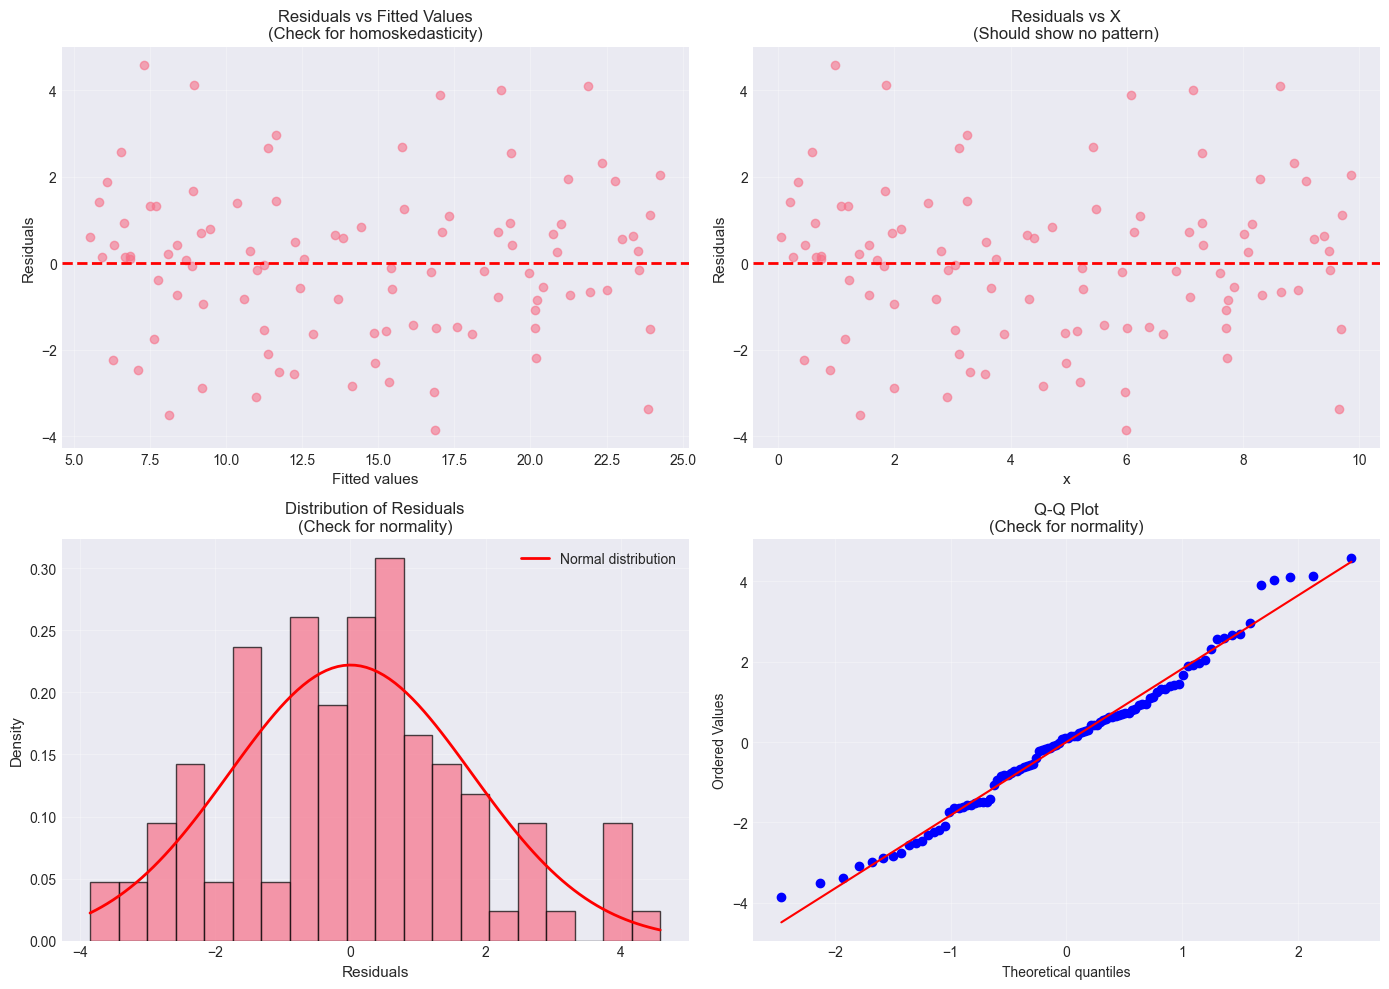

In [8]:
# Exercise 2: Diagnostic plots

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Residuals vs Fitted values (check homoskedasticity)
axes[0, 0].scatter(y_hat, u_hat, alpha=0.6)
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Fitted values', fontsize=11)
axes[0, 0].set_ylabel('Residuals', fontsize=11)
axes[0, 0].set_title('Residuals vs Fitted Values\n(Check for homoskedasticity)', fontsize=12)
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuals vs X
axes[0, 1].scatter(x, u_hat, alpha=0.6)
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('x', fontsize=11)
axes[0, 1].set_ylabel('Residuals', fontsize=11)
axes[0, 1].set_title('Residuals vs X\n(Should show no pattern)', fontsize=12)
axes[0, 1].grid(True, alpha=0.3)

# 3. Histogram of residuals (check normality)
axes[1, 0].hist(u_hat, bins=20, edgecolor='black', alpha=0.7, density=True)
# Overlay normal distribution
x_norm = np.linspace(u_hat.min(), u_hat.max(), 100)
axes[1, 0].plot(x_norm, stats.norm.pdf(x_norm, 0, np.std(u_hat)), 
                'r-', linewidth=2, label='Normal distribution')
axes[1, 0].set_xlabel('Residuals', fontsize=11)
axes[1, 0].set_ylabel('Density', fontsize=11)
axes[1, 0].set_title('Distribution of Residuals\n(Check for normality)', fontsize=12)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Q-Q plot (check normality)
stats.probplot(u_hat, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot\n(Check for normality)', fontsize=12)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Exercise 3: Variance of OLS Estimators

Calculate the variance of OLS estimators:

$$V(\hat{b}_1) = \frac{\sigma^2}{\sum(x_i - \bar{x})^2}$$

$$V(\hat{b}_0) = \frac{\sigma^2}{N} + \bar{x}^2 V(\hat{b}_1)$$

Where $\hat{\sigma}^2 = \frac{\sum \hat{u}_i^2}{N - 2}$

In [9]:
# Exercise 3: Variance of OLS estimators

# TODO: Calculate estimated variance of errors
sigma_squared_hat = np.sum(u_hat**2) / (N - 2)

# TODO: Calculate variance of b1_hat
var_b1_hat = sigma_squared_hat / np.sum((x - x_bar)**2)

# TODO: Calculate variance of b0_hat
var_b0_hat = (sigma_squared_hat / N) + (x_bar**2 * var_b1_hat)

# Calculate standard errors
se_b1_hat = np.sqrt(var_b1_hat)
se_b0_hat = np.sqrt(var_b0_hat)

# Calculate t-statistics
t_stat_b0 = b0_hat / se_b0_hat
t_stat_b1 = b1_hat / se_b1_hat

# Calculate p-values (two-tailed test)
p_value_b0 = 2 * (1 - stats.t.cdf(abs(t_stat_b0), N - 2))
p_value_b1 = 2 * (1 - stats.t.cdf(abs(t_stat_b1), N - 2))

print("Variance and Inference for OLS Estimators:\n")
print(f"Estimated σ²: {sigma_squared_hat:.4f}")
print(f"\nParameter estimates:")
print(f"b0_hat = {b0_hat:.4f}, SE = {se_b0_hat:.4f}, t = {t_stat_b0:.4f}, p-value = {p_value_b0:.4f}")
print(f"b1_hat = {b1_hat:.4f}, SE = {se_b1_hat:.4f}, t = {t_stat_b1:.4f}, p-value = {p_value_b1:.4f}")

# 95% Confidence intervals
t_critical = stats.t.ppf(0.975, N - 2)
ci_b0 = (b0_hat - t_critical * se_b0_hat, b0_hat + t_critical * se_b0_hat)
ci_b1 = (b1_hat - t_critical * se_b1_hat, b1_hat + t_critical * se_b1_hat)

print(f"\n95% Confidence Intervals:")
print(f"b0: [{ci_b0[0]:.4f}, {ci_b0[1]:.4f}] (True: {b0_true})")
print(f"b1: [{ci_b1[0]:.4f}, {ci_b1[1]:.4f}] (True: {b1_true})")

Variance and Inference for OLS Estimators:

Estimated σ²: 3.2922

Parameter estimates:
b0_hat = 5.4302, SE = 0.3406, t = 15.9443, p-value = 0.0000
b1_hat = 1.9080, SE = 0.0613, t = 31.1269, p-value = 0.0000

95% Confidence Intervals:
b0: [4.7543, 6.1060] (True: 5)
b1: [1.7864, 2.0297] (True: 2)


## Exercise 4: Model Interpretation

### Part A: Log transformations

Compare different functional forms:
1. **Linear-Linear**: $y = b_0 + b_1 x$
2. **Log-Linear** (Semi-log): $\log(y) = b_0 + b_1 x$ → $b_1$ is the percentage change in y for 1 unit change in x
3. **Linear-Log**: $y = b_0 + b_1 \log(x)$
4. **Log-Log**: $\log(y) = b_0 + b_1 \log(x)$ → $b_1$ is the elasticity

In [11]:
# Exercise 4A: Generate data for log transformations

# Generate new data with multiplicative structure
N = 100
x_pos = np.random.uniform(1, 10, N)  # Positive x for log transformation
u_mult = np.random.lognormal(0, 0.3, N)  # Multiplicative error

# Generate y with exponential relationship
y_exp = 5 * np.exp(0.2 * x_pos) * u_mult

# Create DataFrame
df = pd.DataFrame({
    'x': x_pos,
    'y': y_exp,
    'log_x': np.log(x_pos),
    'log_y': np.log(y_exp)
})

# Fit different models
models = {}

# 1. Linear-Linear
X_lin = sm.add_constant(df['x'])
models['linear-linear'] = sm.OLS(df['y'], X_lin).fit()

# 2. Log-Linear
X_lin = sm.add_constant(df['x'])
models['log-linear'] = sm.OLS(df['log_y'], X_lin).fit()

# 3. Linear-Log
X_log = sm.add_constant(df['log_x'])
models['linear-log'] = sm.OLS(df['y'], X_log).fit()

# 4. Log-Log
X_log = sm.add_constant(df['log_x'])
models['log-log'] = sm.OLS(df['log_y'], X_log).fit()

# Compare R-squared values
print("Model Comparison:\n")
for name, model in models.items():
    print(f"{name:15} R² = {model.rsquared:.4f}")
    print(f"                Coefficients: b0 = {model.params[0]:.4f}, b1 = {model.params[1]:.4f}")
    print()

Model Comparison:

linear-linear   R² = 0.6472
                Coefficients: b0 = -0.9537, b1 = 3.3599

log-linear      R² = 0.7579
                Coefficients: b0 = 1.5881, b1 = 0.1974

linear-log      R² = 0.5383
                Coefficients: b0 = -3.4963, b1 = 13.8655

log-log         R² = 0.7290
                Coefficients: b0 = 1.3369, b1 = 0.8760



/var/folders/9t/_dbsg1912_q5_0l71jrhnvlr0000gn/T/ipykernel_53400/3380754141.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"                Coefficients: b0 = {model.params[0]:.4f}, b1 = {model.params[1]:.4f}")


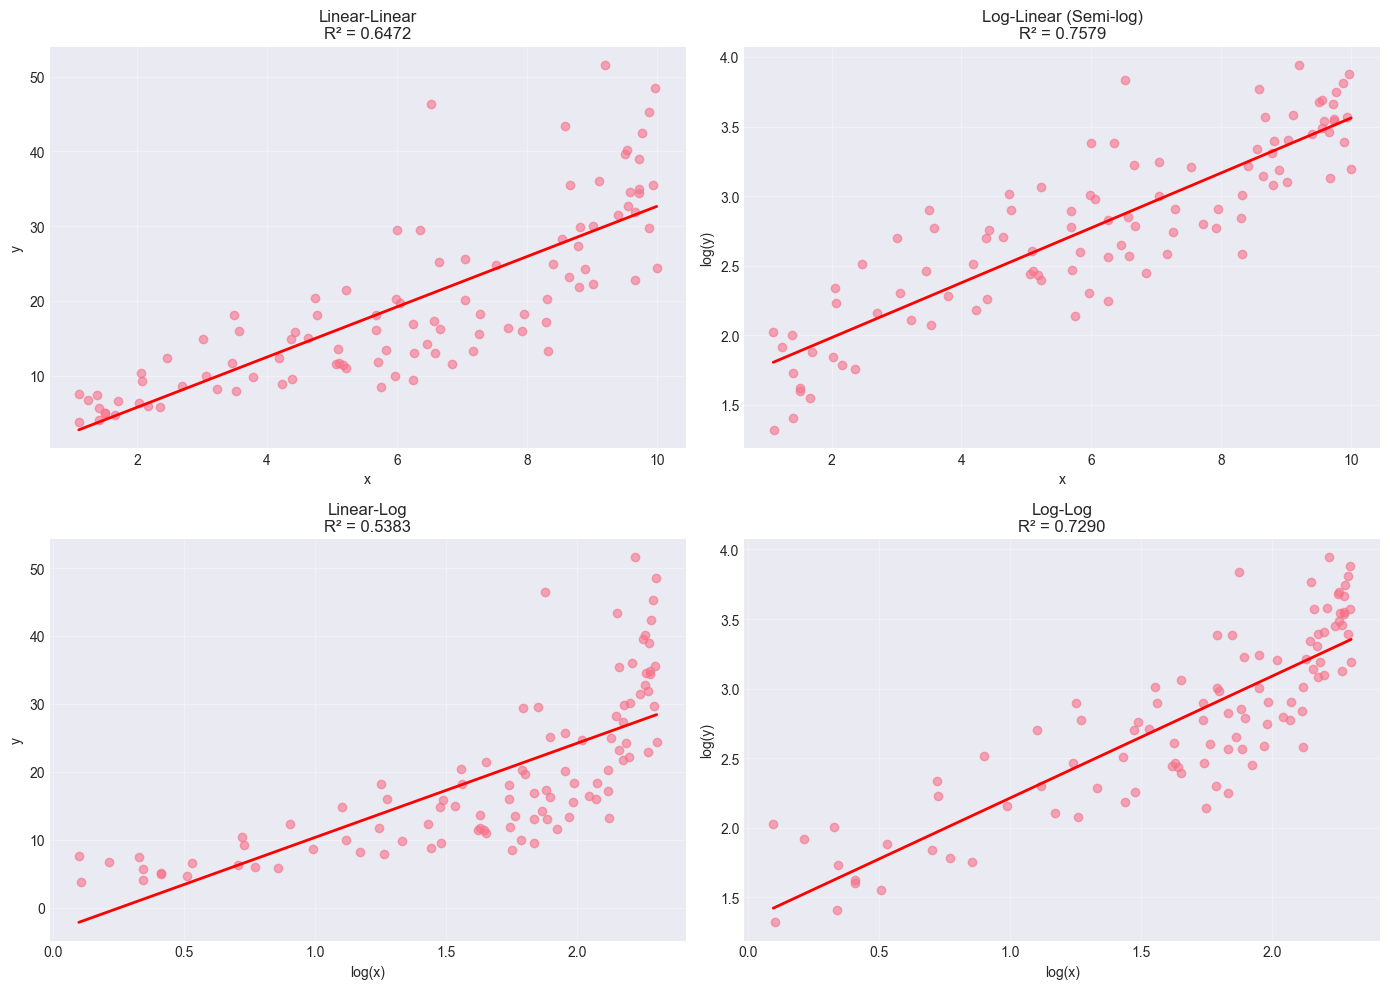


Interpretation:
Log-Linear: b1 = 0.1974
  → 1 unit increase in x leads to 19.74% change in y

Log-Log: b1 = 0.8760
  → 1% increase in x leads to 0.88% change in y (elasticity)


/var/folders/9t/_dbsg1912_q5_0l71jrhnvlr0000gn/T/ipykernel_53400/996802578.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Log-Linear: b1 = {models['log-linear'].params[1]:.4f}")
/var/folders/9t/_dbsg1912_q5_0l71jrhnvlr0000gn/T/ipykernel_53400/996802578.py:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"  → 1 unit increase in x leads to {models['log-linear'].params[1]*100:.2f}% change in y")
/var/folders/9t/_dbsg1912_q5_0l71jrhnvlr0000gn/T/ipykernel_53400/996802578.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be

In [15]:
# Exercise 4A: Visualize different functional forms

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

x_sorted = np.sort(df['x'])
sort_idx = np.argsort(df['x'].values)

# 1. Linear-Linear
axes[0, 0].scatter(df['x'], df['y'], alpha=0.6)
y_pred = models['linear-linear'].predict(sm.add_constant(x_sorted))
axes[0, 0].plot(x_sorted, y_pred, 'r-', linewidth=2)
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('y')
axes[0, 0].set_title(f'Linear-Linear\nR² = {models["linear-linear"].rsquared:.4f}')
axes[0, 0].grid(True, alpha=0.3)

# 2. Log-Linear
axes[0, 1].scatter(df['x'], df['log_y'], alpha=0.6)
log_y_pred = models['log-linear'].predict(sm.add_constant(x_sorted))
axes[0, 1].plot(x_sorted, log_y_pred, 'r-', linewidth=2)
axes[0, 1].set_xlabel('x')
axes[0, 1].set_ylabel('log(y)')
axes[0, 1].set_title(f'Log-Linear (Semi-log)\nR² = {models["log-linear"].rsquared:.4f}')
axes[0, 1].grid(True, alpha=0.3)

# 3. Linear-Log
axes[1, 0].scatter(df['log_x'], df['y'], alpha=0.6)
log_x_sorted = np.sort(df['log_x'])
y_pred_log = models['linear-log'].predict(sm.add_constant(log_x_sorted))
axes[1, 0].plot(log_x_sorted, y_pred_log, 'r-', linewidth=2)
axes[1, 0].set_xlabel('log(x)')
axes[1, 0].set_ylabel('y')
axes[1, 0].set_title(f'Linear-Log\nR² = {models["linear-log"].rsquared:.4f}')
axes[1, 0].grid(True, alpha=0.3)

# 4. Log-Log
axes[1, 1].scatter(df['log_x'], df['log_y'], alpha=0.6)
log_y_pred_log = models['log-log'].predict(sm.add_constant(log_x_sorted))
axes[1, 1].plot(log_x_sorted, log_y_pred_log, 'r-', linewidth=2)
axes[1, 1].set_xlabel('log(x)')
axes[1, 1].set_ylabel('log(y)')
axes[1, 1].set_title(f'Log-Log\nR² = {models["log-log"].rsquared:.4f}')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nInterpretation:")
print(f"Log-Linear: b1 = {models['log-linear'].params[1]:.4f}")
print(f"  → 1 unit increase in x leads to {models['log-linear'].params[1]*100:.2f}% change in y")
print(f"\nLog-Log: b1 = {models['log-log'].params[1]:.4f}")
print(f"  → 1% increase in x leads to {models['log-log'].params[1]:.2f}% change in y (elasticity)")

## Exercise 5: Multiple Linear Regression

Consider the multiple linear model:

$$y_i = b_0 + b_1 x_{i,1} + b_2 x_{i,2} + b_3 x_{i,3} + u_i$$

Or in matrix form: $y = Xb + u$

OLS estimator: $\hat{b} = (X'X)^{-1}X'y$

In [16]:
# Exercise 5: Multiple Linear Regression

# Generate data with multiple predictors
N = 200
np.random.seed(42)

# Generate correlated predictors
mean = [0, 0, 0]
cov = [[1, 0.3, 0.2],
       [0.3, 1, 0.4],
       [0.2, 0.4, 1]]
X_data = np.random.multivariate_normal(mean, cov, N)

# True coefficients
b_true = np.array([5, 2, -3, 1.5])

# Generate y
X_matrix = np.column_stack([np.ones(N), X_data])
u_multi = np.random.normal(0, 2, N)
y_multi = X_matrix @ b_true + u_multi

# TODO: Implement OLS using matrix algebra
# b_hat = (X'X)^(-1) X'y
XtX = X_matrix.T @ X_matrix
XtX_inv = np.linalg.inv(XtX)
Xty = X_matrix.T @ y_multi
b_hat_multi = XtX_inv @ Xty

print("Multiple Linear Regression Results:\n")
print("True coefficients:")
print(f"b0 = {b_true[0]}, b1 = {b_true[1]}, b2 = {b_true[2]}, b3 = {b_true[3]}")
print("\nEstimated coefficients:")
print(f"b0_hat = {b_hat_multi[0]:.4f}")
print(f"b1_hat = {b_hat_multi[1]:.4f}")
print(f"b2_hat = {b_hat_multi[2]:.4f}")
print(f"b3_hat = {b_hat_multi[3]:.4f}")

# Calculate fitted values and residuals
y_hat_multi = X_matrix @ b_hat_multi
u_hat_multi = y_multi - y_hat_multi

# Calculate R-squared
SST_multi = np.sum((y_multi - np.mean(y_multi))**2)
SSE_multi = np.sum(u_hat_multi**2)
R2_multi = 1 - SSE_multi / SST_multi

# Calculate adjusted R-squared
k = X_matrix.shape[1]  # number of parameters
R2_adj_multi = 1 - (N - 1) / (N - k) * (1 - R2_multi)

print(f"\nR² = {R2_multi:.4f}")
print(f"Adjusted R² = {R2_adj_multi:.4f}")

Multiple Linear Regression Results:

True coefficients:
b0 = 5.0, b1 = 2.0, b2 = -3.0, b3 = 1.5

Estimated coefficients:
b0_hat = 5.0376
b1_hat = 2.2674
b2_hat = -3.2434
b3_hat = 1.5972

R² = 0.7238
Adjusted R² = 0.7196


### Part B: Compare with statsmodels

In [34]:
# Exercise 5B: Verify with statsmodels

model_multi = sm.OLS(y_multi, X_matrix).fit()
print("Statsmodels OLS Summary:")
print(model_multi.summary())

# Compare estimates
print("\n" + "="*60)
print("Comparison of estimates:")
print("="*60)
print(f"{'Parameter':<12} {'Manual':<12} {'Statsmodels':<12} {'Difference':<12}")
print("-"*60)
for i in range(len(b_hat_multi)):
    diff = abs(b_hat_multi[i] - model_multi.params[i])
    print(f"b{i:<11} {b_hat_multi[i]:<12.6f} {model_multi.params[i]:<12.6f} {diff:<12.8f}")

Statsmodels OLS Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     171.2
Date:                Wed, 12 Nov 2025   Prob (F-statistic):           1.65e-54
Time:                        19:37:39   Log-Likelihood:                -423.66
No. Observations:                 200   AIC:                             855.3
Df Residuals:                     196   BIC:                             868.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0376      

## Exercise 6: Projection Matrices and Geometry of OLS

The OLS estimator can be understood geometrically:

- $P_X = X(X'X)^{-1}X'$ is the projection matrix onto the column space of X
- $M_X = I - P_X$ projects onto the orthogonal complement
- $\hat{y} = P_X y$ (projection of y onto X)
- $\hat{u} = M_X y$ (residuals)

Properties:
- $P_X$ is idempotent: $P_X P_X = P_X$
- $P_X$ is symmetric: $P_X' = P_X$
- $X'\hat{u} = 0$ (normal equations)

In [35]:
# Exercise 6: Projection matrices

# TODO: Calculate projection matrix P_X
P_X = X_matrix @ XtX_inv @ X_matrix.T

# TODO: Calculate M_X
I = np.eye(N)
M_X = I - P_X

# Verify properties
print("Projection Matrix Properties:\n")

# 1. Idempotence
P_X_squared = P_X @ P_X
idempotent_check = np.allclose(P_X, P_X_squared)
print(f"1. P_X is idempotent (P_X @ P_X = P_X): {idempotent_check}")
print(f"   Max difference: {np.max(np.abs(P_X - P_X_squared)):.10f}")

# 2. Symmetry
symmetric_check = np.allclose(P_X, P_X.T)
print(f"\n2. P_X is symmetric (P_X = P_X'): {symmetric_check}")
print(f"   Max difference: {np.max(np.abs(P_X - P_X.T)):.10f}")

# 3. Projection gives fitted values
y_hat_projection = P_X @ y_multi
projection_check = np.allclose(y_hat_multi, y_hat_projection)
print(f"\n3. ŷ = P_X y: {projection_check}")
print(f"   Max difference: {np.max(np.abs(y_hat_multi - y_hat_projection)):.10f}")

# 4. M_X gives residuals
u_hat_projection = M_X @ y_multi
residual_check = np.allclose(u_hat_multi, u_hat_projection)
print(f"\n4. û = M_X y: {residual_check}")
print(f"   Max difference: {np.max(np.abs(u_hat_multi - u_hat_projection)):.10f}")

# 5. Normal equations (X'û = 0)
normal_eq = X_matrix.T @ u_hat_multi
normal_check = np.allclose(normal_eq, 0)
print(f"\n5. Normal equations (X'û = 0): {normal_check}")
print(f"   X'û = {normal_eq}")
print(f"   Max absolute value: {np.max(np.abs(normal_eq)):.10f}")

# 6. Orthogonality: ŷ ⊥ û
orthogonality = np.dot(y_hat_multi, u_hat_multi)
ortho_check = np.allclose(orthogonality, 0)
print(f"\n6. ŷ ⊥ û (orthogonality): {ortho_check}")
print(f"   ŷ'û = {orthogonality:.10f}")

# 7. Pythagorean theorem: ||y||² = ||ŷ||² + ||û||²
y_norm_sq = np.sum((y_multi - np.mean(y_multi))**2)
y_hat_norm_sq = np.sum((y_hat_multi - np.mean(y_multi))**2)
u_hat_norm_sq = np.sum(u_hat_multi**2)
pythagoras_check = np.allclose(y_norm_sq, y_hat_norm_sq + u_hat_norm_sq)
print(f"\n7. Pythagorean theorem (SST = SSR + SSE): {pythagoras_check}")
print(f"   SST = {y_norm_sq:.4f}")
print(f"   SSR + SSE = {y_hat_norm_sq:.4f} + {u_hat_norm_sq:.4f} = {y_hat_norm_sq + u_hat_norm_sq:.4f}")
print(f"   Difference: {abs(y_norm_sq - (y_hat_norm_sq + u_hat_norm_sq)):.10f}")

Projection Matrix Properties:

1. P_X is idempotent (P_X @ P_X = P_X): True
   Max difference: 0.0000000000

2. P_X is symmetric (P_X = P_X'): True
   Max difference: 0.0000000000

3. ŷ = P_X y: True
   Max difference: 0.0000000000

4. û = M_X y: True
   Max difference: 0.0000000000

5. Normal equations (X'û = 0): True
   X'û = [-2.62900812e-13 -5.50670620e-14 -2.15827356e-13 -3.55271368e-15]
   Max absolute value: 0.0000000000

6. ŷ ⊥ û (orthogonality): True
   ŷ'û = -0.0000000000

7. Pythagorean theorem (SST = SSR + SSE): True
   SST = 2932.9030
   SSR + SSE = 2122.8767 + 810.0263 = 2932.9030
   Difference: 0.0000000000


## Exercise 7: Simulation Study - Consistency and Asymptotic Properties

Investigate the asymptotic properties of OLS estimators by simulation:
- Show that estimates converge to true values as N increases (consistency)
- Show that the variance decreases as N increases
- Verify asymptotic normality using the Central Limit Theorem

In [36]:
# Exercise 7: Consistency simulation

# True parameters
b0_true_sim = 3
b1_true_sim = 1.5
sigma_sim = 2

# Different sample sizes
sample_sizes = [20, 50, 100, 200, 500, 1000, 2000, 5000]
n_simulations = 1000

results = {}

for N_sim in sample_sizes:
    b0_estimates = []
    b1_estimates = []
    
    for _ in range(n_simulations):
        # Generate data
        x_sim = np.random.uniform(0, 10, N_sim)
        u_sim = np.random.normal(0, sigma_sim, N_sim)
        y_sim = b0_true_sim + b1_true_sim * x_sim + u_sim
        
        # Estimate parameters
        x_bar_sim = np.mean(x_sim)
        y_bar_sim = np.mean(y_sim)
        b1_hat_sim = np.sum((x_sim - x_bar_sim) * (y_sim - y_bar_sim)) / np.sum((x_sim - x_bar_sim)**2)
        b0_hat_sim = y_bar_sim - b1_hat_sim * x_bar_sim
        
        b0_estimates.append(b0_hat_sim)
        b1_estimates.append(b1_hat_sim)
    
    results[N_sim] = {
        'b0_mean': np.mean(b0_estimates),
        'b0_var': np.var(b0_estimates, ddof=1),
        'b1_mean': np.mean(b1_estimates),
        'b1_var': np.var(b1_estimates, ddof=1),
        'b0_estimates': b0_estimates,
        'b1_estimates': b1_estimates
    }

# Display results
print(f"Consistency Simulation ({n_simulations} replications per sample size)\n")
print(f"True parameters: b0 = {b0_true_sim}, b1 = {b1_true_sim}\n")
print(f"{'N':<8} {'E(b0_hat)':<12} {'V(b0_hat)':<12} {'E(b1_hat)':<12} {'V(b1_hat)':<12}")
print("-" * 60)
for N_sim in sample_sizes:
    r = results[N_sim]
    print(f"{N_sim:<8} {r['b0_mean']:<12.4f} {r['b0_var']:<12.6f} {r['b1_mean']:<12.4f} {r['b1_var']:<12.6f}")

Consistency Simulation (1000 replications per sample size)

True parameters: b0 = 3, b1 = 1.5

N        E(b0_hat)    V(b0_hat)    E(b1_hat)    V(b1_hat)   
------------------------------------------------------------
20       3.0244       0.930509     1.4980       0.028709    
50       2.9990       0.318550     1.4983       0.010041    
100      3.0123       0.156889     1.4990       0.004657    
200      3.0025       0.082028     1.4981       0.002537    
500      2.9935       0.029597     1.5019       0.000910    
1000     2.9969       0.017588     1.5003       0.000532    
2000     3.0026       0.008078     1.4992       0.000249    
5000     3.0021       0.003234     1.4999       0.000095    


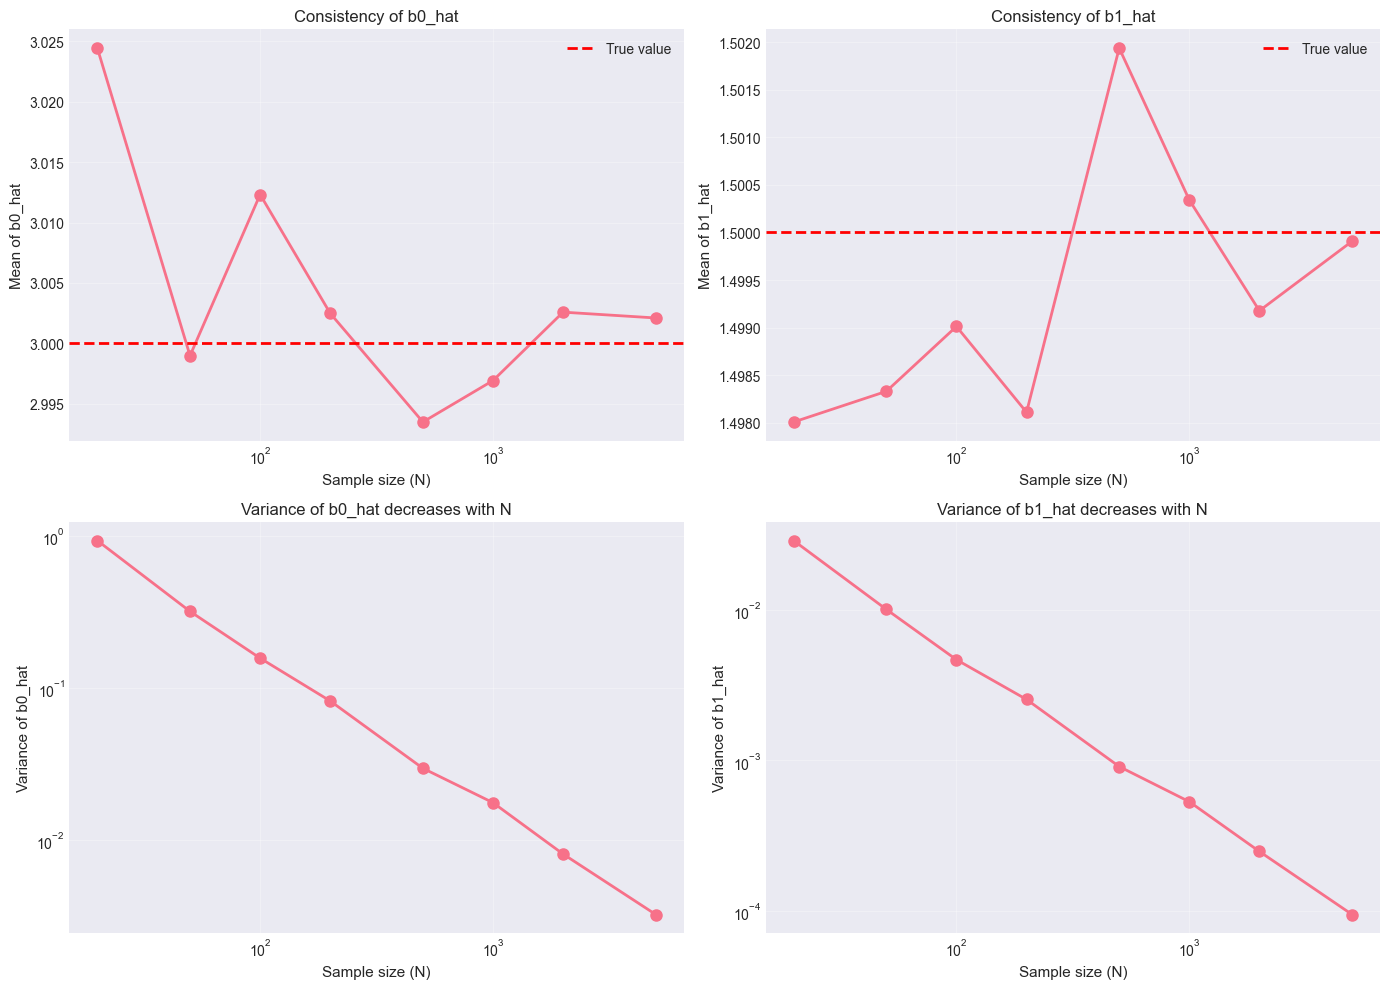

In [37]:
# Exercise 7: Visualize consistency

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Convergence of b0
b0_means = [results[N]['b0_mean'] for N in sample_sizes]
axes[0, 0].plot(sample_sizes, b0_means, 'o-', linewidth=2, markersize=8)
axes[0, 0].axhline(y=b0_true_sim, color='r', linestyle='--', linewidth=2, label='True value')
axes[0, 0].set_xlabel('Sample size (N)', fontsize=11)
axes[0, 0].set_ylabel('Mean of b0_hat', fontsize=11)
axes[0, 0].set_title('Consistency of b0_hat', fontsize=12)
axes[0, 0].set_xscale('log')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Convergence of b1
b1_means = [results[N]['b1_mean'] for N in sample_sizes]
axes[0, 1].plot(sample_sizes, b1_means, 'o-', linewidth=2, markersize=8)
axes[0, 1].axhline(y=b1_true_sim, color='r', linestyle='--', linewidth=2, label='True value')
axes[0, 1].set_xlabel('Sample size (N)', fontsize=11)
axes[0, 1].set_ylabel('Mean of b1_hat', fontsize=11)
axes[0, 1].set_title('Consistency of b1_hat', fontsize=12)
axes[0, 1].set_xscale('log')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Variance of b0
b0_vars = [results[N]['b0_var'] for N in sample_sizes]
axes[1, 0].plot(sample_sizes, b0_vars, 'o-', linewidth=2, markersize=8)
axes[1, 0].set_xlabel('Sample size (N)', fontsize=11)
axes[1, 0].set_ylabel('Variance of b0_hat', fontsize=11)
axes[1, 0].set_title('Variance of b0_hat decreases with N', fontsize=12)
axes[1, 0].set_xscale('log')
axes[1, 0].set_yscale('log')
axes[1, 0].grid(True, alpha=0.3)

# 4. Variance of b1
b1_vars = [results[N]['b1_var'] for N in sample_sizes]
axes[1, 1].plot(sample_sizes, b1_vars, 'o-', linewidth=2, markersize=8)
axes[1, 1].set_xlabel('Sample size (N)', fontsize=11)
axes[1, 1].set_ylabel('Variance of b1_hat', fontsize=11)
axes[1, 1].set_title('Variance of b1_hat decreases with N', fontsize=12)
axes[1, 1].set_xscale('log')
axes[1, 1].set_yscale('log')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

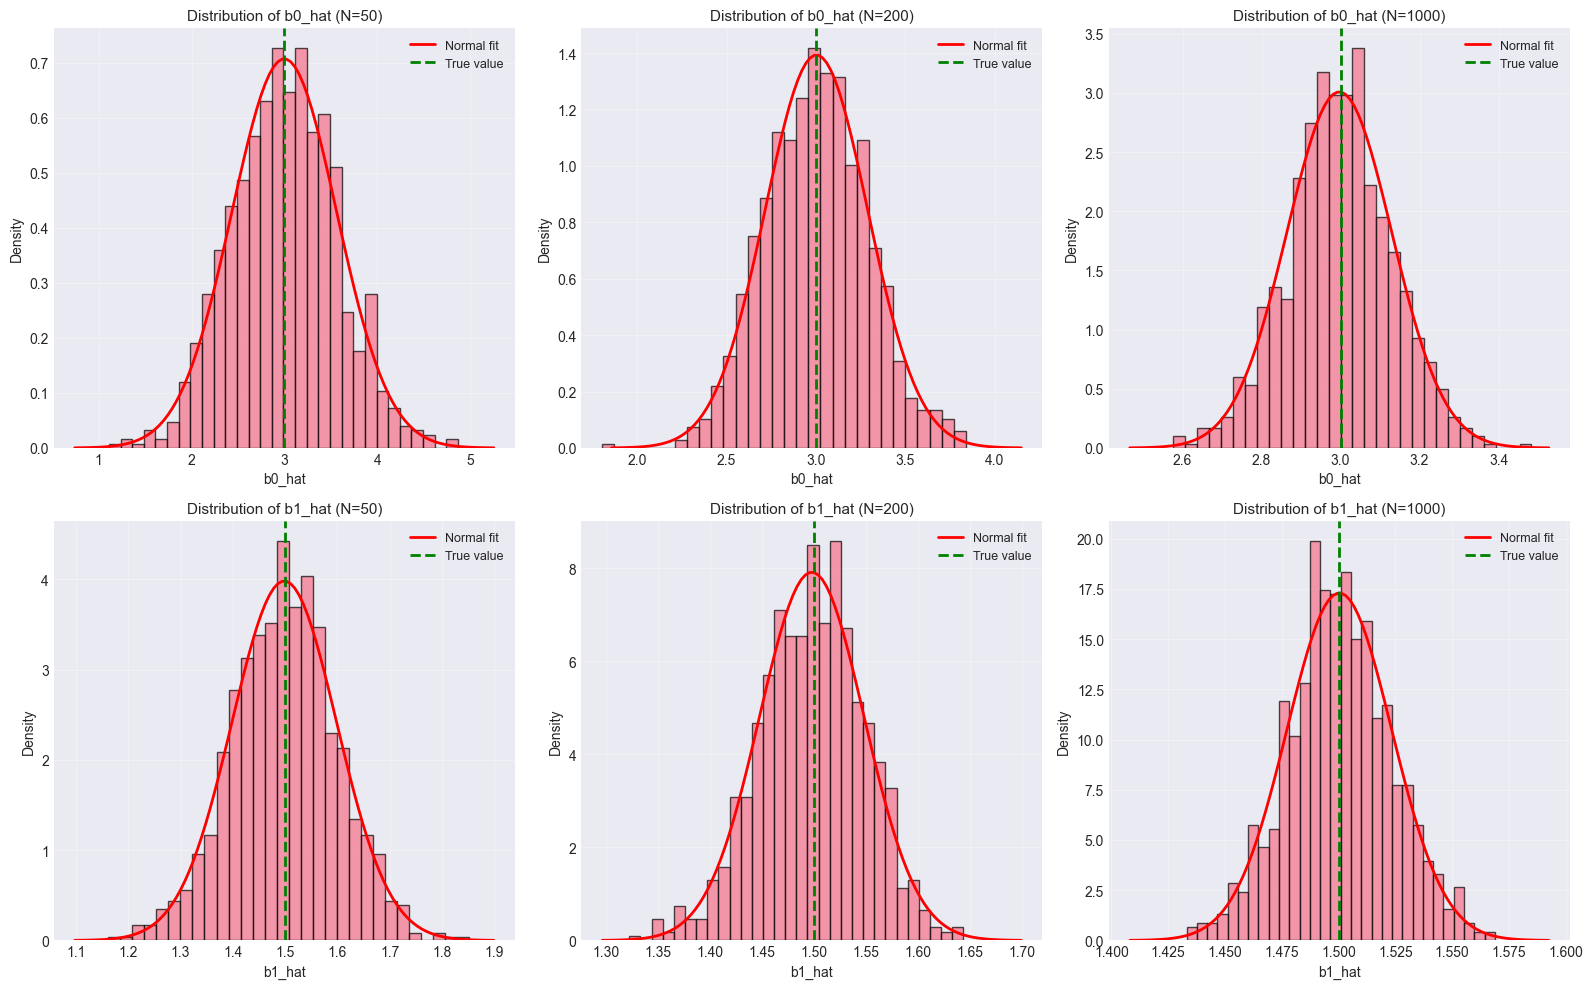

Observation: As sample size increases, the distribution of estimators:
1. Centers more tightly around the true value (consistency)
2. Becomes more symmetric and bell-shaped (asymptotic normality via CLT)
3. Has decreasing variance (more precise estimates)


In [38]:
# Exercise 7: Asymptotic normality (Central Limit Theorem)

fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Show distribution for different sample sizes
selected_sizes = [50, 200, 1000]

for idx, N_sim in enumerate(selected_sizes):
    # b0 distribution
    b0_est = results[N_sim]['b0_estimates']
    axes[0, idx].hist(b0_est, bins=30, density=True, alpha=0.7, edgecolor='black')
    
    # Overlay normal distribution
    mean_b0 = np.mean(b0_est)
    std_b0 = np.std(b0_est, ddof=1)
    x_range = np.linspace(mean_b0 - 4*std_b0, mean_b0 + 4*std_b0, 100)
    axes[0, idx].plot(x_range, stats.norm.pdf(x_range, mean_b0, std_b0), 
                     'r-', linewidth=2, label='Normal fit')
    axes[0, idx].axvline(b0_true_sim, color='g', linestyle='--', linewidth=2, label='True value')
    axes[0, idx].set_xlabel('b0_hat', fontsize=10)
    axes[0, idx].set_ylabel('Density', fontsize=10)
    axes[0, idx].set_title(f'Distribution of b0_hat (N={N_sim})', fontsize=11)
    axes[0, idx].legend(fontsize=9)
    axes[0, idx].grid(True, alpha=0.3)
    
    # b1 distribution
    b1_est = results[N_sim]['b1_estimates']
    axes[1, idx].hist(b1_est, bins=30, density=True, alpha=0.7, edgecolor='black')
    
    # Overlay normal distribution
    mean_b1 = np.mean(b1_est)
    std_b1 = np.std(b1_est, ddof=1)
    x_range = np.linspace(mean_b1 - 4*std_b1, mean_b1 + 4*std_b1, 100)
    axes[1, idx].plot(x_range, stats.norm.pdf(x_range, mean_b1, std_b1), 
                     'r-', linewidth=2, label='Normal fit')
    axes[1, idx].axvline(b1_true_sim, color='g', linestyle='--', linewidth=2, label='True value')
    axes[1, idx].set_xlabel('b1_hat', fontsize=10)
    axes[1, idx].set_ylabel('Density', fontsize=10)
    axes[1, idx].set_title(f'Distribution of b1_hat (N={N_sim})', fontsize=11)
    axes[1, idx].legend(fontsize=9)
    axes[1, idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Observation: As sample size increases, the distribution of estimators:")
print("1. Centers more tightly around the true value (consistency)")
print("2. Becomes more symmetric and bell-shaped (asymptotic normality via CLT)")
print("3. Has decreasing variance (more precise estimates)")

## Exercise 8: Real Data Application

Apply the concepts to a real dataset. We'll use a simulated dataset similar to the education-wage example from the course.

In [39]:
# Exercise 8: Create a realistic dataset

np.random.seed(123)
n_obs = 500

# Generate realistic variables
education = np.random.normal(13, 2.5, n_obs)  # years of education
education = np.clip(education, 8, 20)  # clip to reasonable range

experience = np.random.gamma(5, 2, n_obs)  # years of experience
experience = np.clip(experience, 0, 40)

age = 18 + education + experience + np.random.normal(0, 1, n_obs)
age = np.clip(age, 22, 65)

# Gender (0 = male, 1 = female)
female = np.random.binomial(1, 0.48, n_obs)

# Generate wage with realistic structure
log_wage = (1.5 +                          # baseline
           0.08 * education +              # returns to education
           0.03 * experience +             # returns to experience
           -0.0005 * experience**2 +       # decreasing returns
           -0.15 * female +                # gender wage gap
           np.random.normal(0, 0.3, n_obs))  # random variation

wage = np.exp(log_wage)

# Create DataFrame
df_wage = pd.DataFrame({
    'wage': wage,
    'log_wage': log_wage,
    'education': education,
    'experience': experience,
    'experience_sq': experience**2,
    'age': age,
    'female': female
})

print("Wage Dataset Summary Statistics:")
print(df_wage.describe())

print(f"\nSample size: {n_obs}")
print(f"Female proportion: {female.mean():.3f}")

Wage Dataset Summary Statistics:
             wage    log_wage   education  experience  experience_sq  \
count  500.000000  500.000000  500.000000  500.000000     500.000000   
mean    16.437559    2.716979   12.927990   10.056865     120.105765   
std      6.922240    0.408412    2.448817    4.359271     110.858739   
min      5.251263    1.658469    8.000000    1.726511       2.980842   
25%     11.633663    2.453901   11.274122    6.886430      47.423056   
50%     15.226083    2.723010   12.908727    9.607762      92.309453   
75%     19.412471    2.965916   14.674026   12.556526     157.666344   
max     56.768140    4.038975   20.000000   34.830663    1213.175111   

              age      female  
count  500.000000  500.000000  
mean    40.998346    0.510000  
std      5.221107    0.500401  
min     28.107362    0.000000  
25%     37.409665    0.000000  
50%     40.518043    1.000000  
75%     43.977888    1.000000  
max     65.000000    1.000000  

Sample size: 500
Female propo

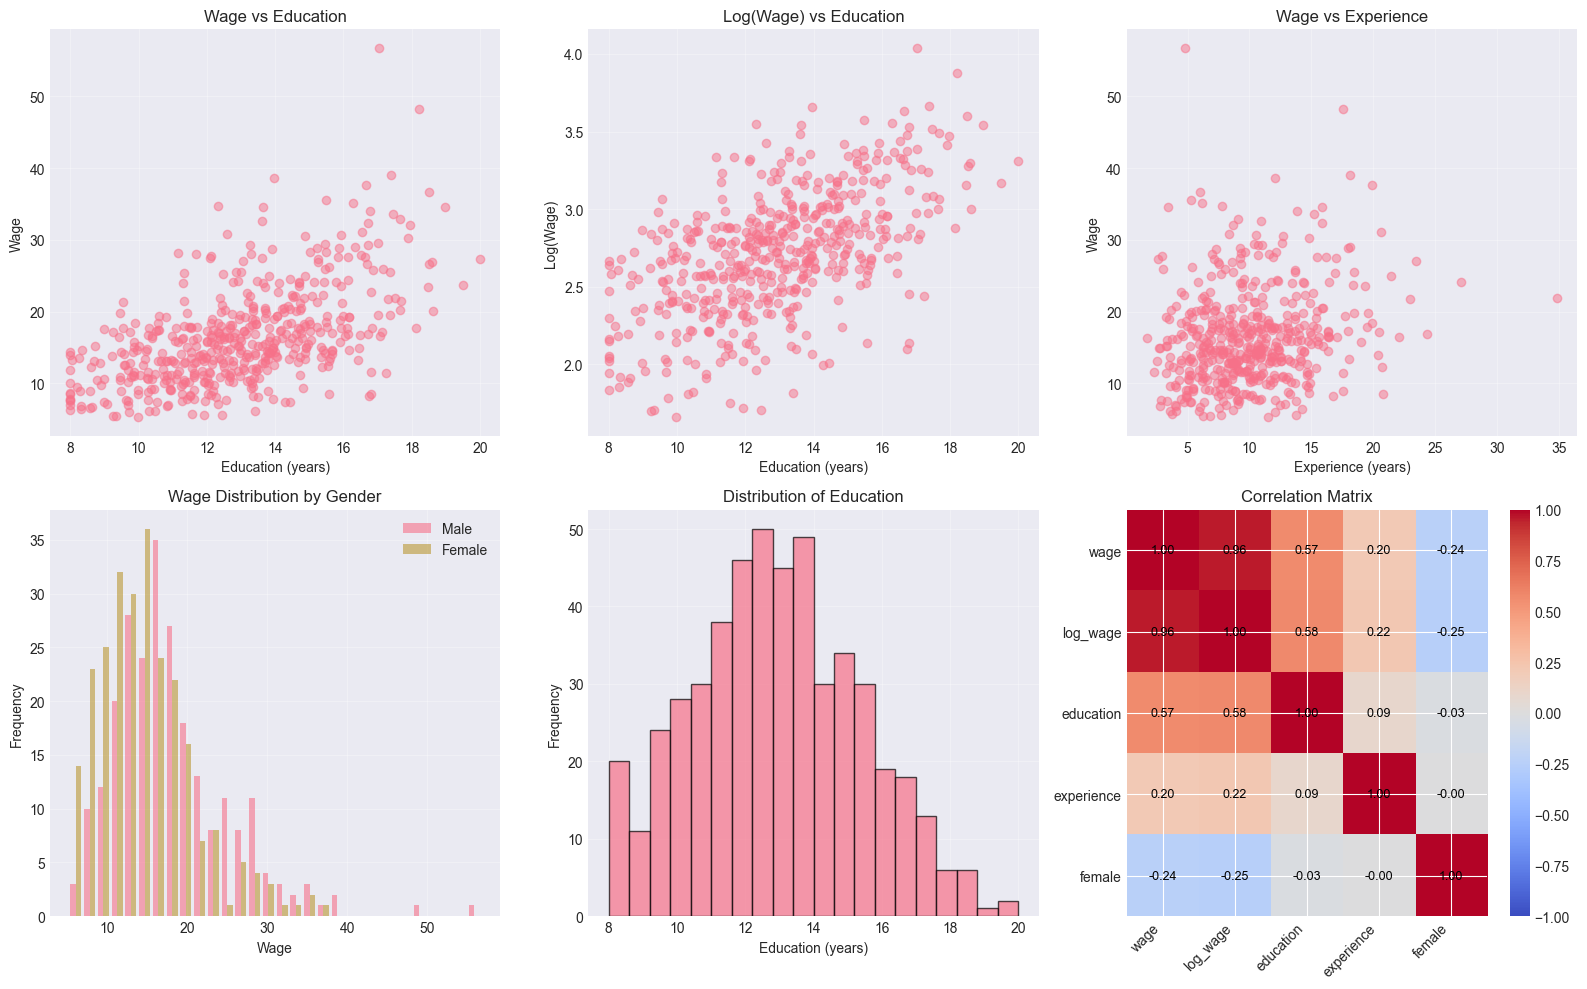

In [40]:
# Exercise 8: Exploratory data analysis

fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# 1. Wage vs Education
axes[0, 0].scatter(df_wage['education'], df_wage['wage'], alpha=0.5)
axes[0, 0].set_xlabel('Education (years)')
axes[0, 0].set_ylabel('Wage')
axes[0, 0].set_title('Wage vs Education')
axes[0, 0].grid(True, alpha=0.3)

# 2. Log(Wage) vs Education
axes[0, 1].scatter(df_wage['education'], df_wage['log_wage'], alpha=0.5)
axes[0, 1].set_xlabel('Education (years)')
axes[0, 1].set_ylabel('Log(Wage)')
axes[0, 1].set_title('Log(Wage) vs Education')
axes[0, 1].grid(True, alpha=0.3)

# 3. Wage vs Experience
axes[0, 2].scatter(df_wage['experience'], df_wage['wage'], alpha=0.5)
axes[0, 2].set_xlabel('Experience (years)')
axes[0, 2].set_ylabel('Wage')
axes[0, 2].set_title('Wage vs Experience')
axes[0, 2].grid(True, alpha=0.3)

# 4. Wage distribution by gender
axes[1, 0].hist([df_wage[df_wage['female']==0]['wage'], 
                df_wage[df_wage['female']==1]['wage']], 
               bins=30, alpha=0.6, label=['Male', 'Female'])
axes[1, 0].set_xlabel('Wage')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Wage Distribution by Gender')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 5. Education distribution
axes[1, 1].hist(df_wage['education'], bins=20, edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('Education (years)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Education')
axes[1, 1].grid(True, alpha=0.3)

# 6. Correlation heatmap
corr_matrix = df_wage[['wage', 'log_wage', 'education', 'experience', 'female']].corr()
im = axes[1, 2].imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1, aspect='auto')
axes[1, 2].set_xticks(range(len(corr_matrix.columns)))
axes[1, 2].set_yticks(range(len(corr_matrix.columns)))
axes[1, 2].set_xticklabels(corr_matrix.columns, rotation=45, ha='right')
axes[1, 2].set_yticklabels(corr_matrix.columns)
axes[1, 2].set_title('Correlation Matrix')

# Add correlation values
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        axes[1, 2].text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                       ha='center', va='center', color='black', fontsize=9)

plt.colorbar(im, ax=axes[1, 2])
plt.tight_layout()
plt.show()

In [41]:
# Exercise 8: Estimate wage equations

# Model 1: Simple regression (education only)
X1 = sm.add_constant(df_wage['education'])
model1 = sm.OLS(df_wage['log_wage'], X1).fit()

# Model 2: Add experience
X2 = sm.add_constant(df_wage[['education', 'experience']])
model2 = sm.OLS(df_wage['log_wage'], X2).fit()

# Model 3: Add experience squared (diminishing returns)
X3 = sm.add_constant(df_wage[['education', 'experience', 'experience_sq']])
model3 = sm.OLS(df_wage['log_wage'], X3).fit()

# Model 4: Full model with gender
X4 = sm.add_constant(df_wage[['education', 'experience', 'experience_sq', 'female']])
model4 = sm.OLS(df_wage['log_wage'], X4).fit()

# Compare models
print("Model Comparison:\n")
print(f"{'Model':<40} {'R²':<10} {'Adj. R²':<10}")
print("-" * 60)
print(f"{'1. log(wage) ~ education':<40} {model1.rsquared:.4f}    {model1.rsquared_adj:.4f}")
print(f"{'2. + experience':<40} {model2.rsquared:.4f}    {model2.rsquared_adj:.4f}")
print(f"{'3. + experience²':<40} {model3.rsquared:.4f}    {model3.rsquared_adj:.4f}")
print(f"{'4. + female':<40} {model4.rsquared:.4f}    {model4.rsquared_adj:.4f}")

print("\n" + "="*80)
print("Final Model Summary:")
print("="*80)
print(model4.summary())

Model Comparison:

Model                                    R²         Adj. R²   
------------------------------------------------------------
1. log(wage) ~ education                 0.3312    0.3299
2. + experience                          0.3597    0.3572
3. + experience²                         0.3604    0.3565
4. + female                              0.4168    0.4121

Final Model Summary:
                            OLS Regression Results                            
Dep. Variable:               log_wage   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     88.44
Date:                Wed, 12 Nov 2025   Prob (F-statistic):           1.14e-56
Time:                        19:44:38   Log-Likelihood:                -126.42
No. Observations:                 500   AIC:                             262.8
Df Residuals:                     495   BIC:      

In [42]:
# Exercise 8: Interpretation

print("Economic Interpretation of Model 4:\n")
print("log(wage) = b0 + b1*education + b2*experience + b3*experience² + b4*female + u")
print("\n" + "="*80)

b = model4.params
se = model4.bse

print(f"\n1. Returns to Education:")
print(f"   Coefficient: {b['education']:.4f} (SE: {se['education']:.4f})")
print(f"   Interpretation: One additional year of education increases wages by")
print(f"   approximately {b['education']*100:.2f}%, holding other factors constant.")

print(f"\n2. Returns to Experience:")
print(f"   Linear term: {b['experience']:.4f} (SE: {se['experience']:.4f})")
print(f"   Quadratic term: {b['experience_sq']:.6f} (SE: {se['experience_sq']:.6f})")
print(f"   The marginal effect of experience depends on experience level:")
print(f"   dy/d(experience) = {b['experience']:.4f} + 2*{b['experience_sq']:.6f}*experience")

# Calculate optimal experience
optimal_exp = -b['experience'] / (2 * b['experience_sq'])
print(f"   Experience effect peaks at approximately {optimal_exp:.1f} years")

# Show marginal effects at different experience levels
exp_levels = [5, 10, 15, 20, 25]
print(f"\n   Marginal effect of experience at different levels:")
for exp in exp_levels:
    marginal = b['experience'] + 2 * b['experience_sq'] * exp
    print(f"   {exp} years: {marginal*100:.3f}% per additional year")

print(f"\n3. Gender Wage Gap:")
print(f"   Coefficient: {b['female']:.4f} (SE: {se['female']:.4f})")
print(f"   Interpretation: Women earn approximately {abs(b['female'])*100:.2f}% less than men,")
print(f"   controlling for education and experience.")
print(f"   This translates to: exp({b['female']:.4f}) - 1 = {(np.exp(b['female']) - 1)*100:.2f}% wage difference")

print(f"\n4. Model Fit:")
print(f"   R² = {model4.rsquared:.4f}")
print(f"   Interpretation: {model4.rsquared*100:.2f}% of wage variation is explained by")
print(f"   education, experience, and gender.")

print("\n" + "="*80)

Economic Interpretation of Model 4:

log(wage) = b0 + b1*education + b2*experience + b3*experience² + b4*female + u


1. Returns to Education:
   Coefficient: 0.0925 (SE: 0.0058)
   Interpretation: One additional year of education increases wages by
   approximately 9.25%, holding other factors constant.

2. Returns to Experience:
   Linear term: 0.0251 (SE: 0.0104)
   Quadratic term: -0.000384 (SE: 0.000410)
   The marginal effect of experience depends on experience level:
   dy/d(experience) = 0.0251 + 2*-0.000384*experience
   Experience effect peaks at approximately 32.7 years

   Marginal effect of experience at different levels:
   5 years: 2.128% per additional year
   10 years: 1.744% per additional year
   15 years: 1.359% per additional year
   20 years: 0.975% per additional year
   25 years: 0.591% per additional year

3. Gender Wage Gap:
   Coefficient: -0.1940 (SE: 0.0280)
   Interpretation: Women earn approximately 19.40% less than men,
   controlling for education and e

## Exercise 9: Challenge Questions

Test your understanding with these questions:

### Question 1
What happens to $R^2$ when you add an irrelevant variable to the model? Why should we use adjusted $R^2$ instead?

### Question 2
Explain the difference between the error term $u_i$ and the residual $\hat{u}_i$.

### Question 3
Why is correlation not causality? Give an example.

### Question 4
What is the interpretation of a coefficient in a log-log model vs a log-linear model?

### Question 5
Verify that the regression line always passes through the point $(\bar{x}, \bar{y})$.

In [43]:
# Exercise 9: Answer verification

# Question 1: Effect of irrelevant variable on R²
print("Question 1: Effect of irrelevant variable on R²\n")

# Add random noise variable
df_wage['noise'] = np.random.normal(0, 1, len(df_wage))

# Model without noise
X_no_noise = sm.add_constant(df_wage[['education', 'experience']])
model_no_noise = sm.OLS(df_wage['log_wage'], X_no_noise).fit()

# Model with noise
X_with_noise = sm.add_constant(df_wage[['education', 'experience', 'noise']])
model_with_noise = sm.OLS(df_wage['log_wage'], X_with_noise).fit()

print(f"Model without noise variable:")
print(f"  R² = {model_no_noise.rsquared:.6f}")
print(f"  Adjusted R² = {model_no_noise.rsquared_adj:.6f}")
print(f"\nModel with irrelevant noise variable:")
print(f"  R² = {model_with_noise.rsquared:.6f}")
print(f"  Adjusted R² = {model_with_noise.rsquared_adj:.6f}")
print(f"\nObservation: R² increased by {model_with_noise.rsquared - model_no_noise.rsquared:.6f}")
print(f"But Adjusted R² changed by {model_with_noise.rsquared_adj - model_no_noise.rsquared_adj:.6f}")
print(f"\nConclusion: R² always increases (or stays the same) when adding variables,")
print(f"even if they're irrelevant. Adjusted R² penalizes adding unnecessary variables.")

Question 1: Effect of irrelevant variable on R²

Model without noise variable:
  R² = 0.359732
  Adjusted R² = 0.357156

Model with irrelevant noise variable:
  R² = 0.361473
  Adjusted R² = 0.357611

Observation: R² increased by 0.001740
But Adjusted R² changed by 0.000455

Conclusion: R² always increases (or stays the same) when adding variables,
even if they're irrelevant. Adjusted R² penalizes adding unnecessary variables.


In [ ]:
# Question 5: Verify regression line passes through (x_bar, y_bar)
print("\nQuestion 5: Regression line passes through (x̄, ȳ)\n")

# Use our original simple regression
print(f"Sample means:")
print(f"  x̄ = {x_bar:.4f}")
print(f"  ȳ = {y_bar:.4f}")

# Predict at x_bar using OLS estimates
y_pred_at_mean = b0_hat + b1_hat * x_bar

print(f"\nOLS estimates:")
print(f"  b0_hat = {b0_hat:.4f}")
print(f"  b1_hat = {b1_hat:.4f}")

print(f"\nPrediction at x̄:")
print(f"  ŷ(x̄) = b0_hat + b1_hat * x̄")
print(f"       = {b0_hat:.4f} + {b1_hat:.4f} * {x_bar:.4f}")
print(f"       = {y_pred_at_mean:.4f}")

print(f"\nVerification:")
print(f"  ŷ(x̄) = {y_pred_at_mean:.6f}")
print(f"  ȳ    = {y_bar:.6f}")
print(f"  Difference = {abs(y_pred_at_mean - y_bar):.10f}")
print(f"\n✓ The regression line passes through (x̄, ȳ)!")

---

## Summary of Exercise 9 Answers

### Key Takeaways:

1. **R² vs Adjusted R²:**
   - R² always increases (or stays same) when adding variables
   - Adjusted R² penalizes unnecessary variables
   - Use adjusted R² when comparing models with different numbers of predictors

2. **Error Term vs Residual:**
   - Error term $u_i$ is unobservable (true deviation from population line)
   - Residual $\hat{u}_i$ is observable (deviation from estimated line)
   - We use residuals to make inferences about error terms

3. **Correlation ≠ Causality:**
   - Three main issues: reverse causality, omitted variables, spurious correlation
   - Need proper identification strategies: RCTs, IV, DiD, RD, natural experiments
   - Economic theory guides causal interpretation

4. **Log Model Interpretations:**
   - **Log-Linear:** $b_1$ = percentage change in Y per unit change in X (semi-elasticity)
   - **Log-Log:** $b_1$ = percentage change in Y per 1% change in X (elasticity)
   - Choose functional form based on data structure and economic theory

5. **Regression Line Property:**
   - The OLS regression line always passes through $(\bar{x}, \bar{y})$
   - This follows directly from the formula: $\hat{b}_0 = \bar{y} - \hat{b}_1\bar{x}$
   - Geometric interpretation: regression line balances residuals around sample mean

---

### Final Thoughts:

These concepts are fundamental to applied econometrics. Understanding them deeply will help you:
- Choose appropriate model specifications
- Interpret regression results correctly
- Avoid common pitfalls in causal inference
- Communicate findings effectively

**Next steps in your econometric journey:**
- Hypothesis testing and confidence intervals
- Violations of Gauss-Markov assumptions (heteroskedasticity, autocorrelation)
- Advanced topics: IV, panel data, time series, limited dependent variables

## Summary and Key Takeaways

### Main Concepts Covered:

1. **Simple Linear Model**: $y_i = b_0 + b_1 x_i + u_i$
   - Error term vs residuals
   - OLS estimation formulas
   - Interpretation of coefficients

2. **Gauss-Markov Assumptions**:
   - $E(u_i|X) = 0$
   - $X$ and $u$ uncorrelated
   - $V(X) \neq 0$
   - Homoskedasticity: $V(u_i) = \sigma^2$
   - No autocorrelation

3. **Properties of OLS Estimators**:
   - BLUE (Best Linear Unbiased Estimators)
   - Consistency (convergence in probability)
   - Asymptotic normality (via CLT)

4. **Goodness of Fit**:
   - $R^2$: proportion of variance explained
   - Adjusted $R^2$: penalty for additional variables
   - Analysis of variance: SST = SSR + SSE

5. **Multiple Linear Regression**:
   - Matrix formulation: $y = Xb + u$
   - OLS estimator: $\hat{b} = (X'X)^{-1}X'y$
   - Projection matrices and geometry of OLS

6. **Model Specification**:
   - Log transformations for different interpretations
   - Polynomial terms for nonlinear relationships
   - Dummy variables for categorical variables

### Practical Skills:
- Implement OLS from scratch
- Verify model assumptions
- Interpret regression coefficients in different contexts
- Compare models using $R^2$ and adjusted $R^2$
- Use Python libraries (numpy, pandas, statsmodels) for econometric analysis